In [2]:
## imports
from qiskit import *
from qiskit.algorithms import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import quantum_info, IBMQ, Aer
from qiskit import BasicAer
from qiskit.utils import QuantumInstance
# backend = BasicAer.get_backend("statevector_simulator")
# quantum_instance = QuantumInstance(backend)
from qiskit.algorithms import AmplitudeEstimation
#from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector
import numpy as np
from numpy import pi
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt

In [3]:
# setup qiskit using IBM_id
# IBMQ.save_account("1c62e8a0d2b058d0e797db9c811bc34582df5553e25812301cd1518662c0ab68d2378ac6c197b65f8be944d04b7e7439f034e3926a44fa8088538b3d13782c1a", overwrite= True)
provider = IBMQ.load_account()
IBMQ.get_provider(hub='ibm-q-education', group='iit-madras-1', project='quantum-computin')
# setup required backends 
lima = provider.get_backend('ibmq_lima')
manila = provider.get_backend('ibmq_manila')
qsm_simulator = Aer.get_backend('qasm_simulator')
stv_simulator = Aer.get_backend('statevector_simulator')
aer = Aer.get_backend('aer_simulator')

In [4]:
from qiskit_finance.circuit.library import NormalDistribution

In [13]:
nq = 5
mean, std = 0, 0.3
nrml_dist = NormalDistribution(nq, mu= mean, sigma= std, name= 'N('+str(mean)+','+str(std)+')')

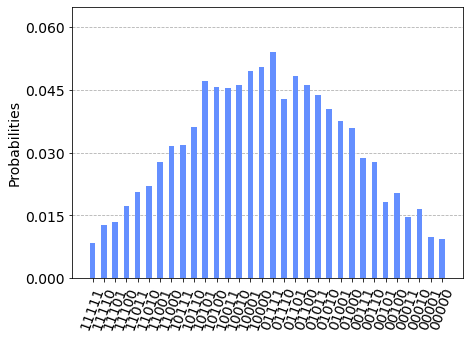

In [16]:
qc.measure_all()
plot_histogram( execute(nrml_dist, aer, shots= 10024 ).result().get_counts() ,bar_labels= False, sort='desc')

In [15]:
qreg = QuantumRegister(nq, name= 'qreg')
ancilla = QuantumRegister(1, name= 'ancilla')
qc = QuantumCircuit(qreg, ancilla) 
qc.append(nrml_dist, list(range(nq)))




qc.draw()

┌───────────┐
 qreg_0: ┤0          ├
         │           │
 qreg_1: ┤1          ├
         │           │
 qreg_2: ┤2 N(0,0.3) ├
         │           │
 qreg_3: ┤3          ├
         │           │
 qreg_4: ┤4          ├
         └───────────┘
ancilla: ─────────────

## 2.

For a boolean function $ f: \{0,1\}^n \to \{1,0\} $ we want to find the number of inputs $\mathbf{x \in X_1}$ such that, $f(\mathbf{x}) = 1 $ and the number of inputs $\mathbf{x \in X_0}$ such that $f(\mathbf{x}) = 0 $

This is kinda' an plausible extension to the vanilla Deustch-Josza algorithm !

In [52]:
def oracle_f(nq= 4):
    qreg, ancilla = QuantumRegister(nq), QuantumRegister(1)
    qc = QuantumCircuit(qreg, ancilla, name= 'oracle')
    qc.x(ancilla)
    qc.h(ancilla)
    # qc.mcx([0,1], ancilla)
    qc.mcx([2,3], ancilla)
    qc.h(ancilla)
    qc.x(ancilla)
    return qc.to_gate()

In [53]:
qreg, ancilla_1, ancilla_2 , creg = QuantumRegister(4, name= 'qreg'), QuantumRegister(1, name= 'ancilla_1'), QuantumRegister(1, name= 'ancilla_2'), ClassicalRegister(1, name='creg')
qc = QuantumCircuit(qreg, ancilla_1, ancilla_2, creg)
qc.h(ancilla_2)
qc.h(qreg)
qc.barrier()
qc.append( oracle_f().control(1, label='C_oracle'),  [5,0,1,2,3,4])
qc.h(ancilla_2)

    
# qc.decompose().draw()        
qc.draw()    

┌───┐ ░ ┌─────────┐     
   qreg_0: ┤ H ├─░─┤0        ├─────
           ├───┤ ░ │         │     
   qreg_1: ┤ H ├─░─┤1        ├─────
           ├───┤ ░ │         │     
   qreg_2: ┤ H ├─░─┤2 oracle ├─────
           ├───┤ ░ │         │     
   qreg_3: ┤ H ├─░─┤3        ├─────
           └───┘ ░ │         │     
ancilla_1: ──────░─┤4        ├─────
           ┌───┐ ░ └────┬────┘┌───┐
ancilla_2: ┤ H ├─░──────■─────┤ H ├
           └───┘ ░   C_oracle └───┘
   creg: 1/════════════════════════

In [54]:
qc.measure(ancilla_2, creg)
job = execute(qc, backend= aer, shots= 10204)
counts = job.result().get_counts()

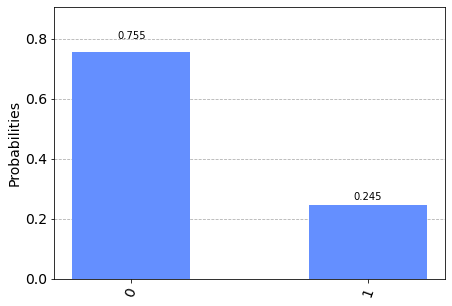

In [55]:
plot_histogram(counts)

In [44]:
6/16, 10/16

(0.375, 0.625)

In [51]:
12/16, 4/16

(0.75, 0.25)